# Beam Energy Dependence Supplemental Data Analysis 

The following code is an analysis of the supplemental data from the paper "Beam Energy Dependence of Jet-Quenching Effects in Au+Au Collisions at $\sqrt{s_{NN}}$ = 7.7, 11.5, 14.5, 19.6, 27, 39, and 62.4 GeV". The data is in the format of csv files extracted from HEPData https://www.hepdata.net/record/100537. 

Please download the csv files, which will be in a .zip format. Then open the .zip to make a folder, and change the directory path to the downloaded folder path (See **Change Directory**). 

In [199]:
%matplotlib notebook

# import modules
from numpy import *
from os import path
import csv
import yaml
from collections import defaultdict
import copy
import matplotlib.pyplot as plt
import warnings

# define plot style
width = 0.05
plotMarkerSize = 8
labelfontsize = 15
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6., 4.5]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.format'] = "pdf"

# colors used
cmap = mpl.cm.tab20


## Change Directory:

Change the directory location below based on where your downloaded folder is. For example, if it is in downloads, then the path will be "Downloads/HEPData-ins1609067-v1-csv".

In [200]:
# directory home
home = path.expanduser("~")

# csv files imported from hepdata tables
hepdata_path = path.join(home,"Downloads/HEPData-ins1609067-v1-csv")


In [201]:
# create paths for tables 1 to 109 in in folder
hepdata_csv_paths = [hepdata_path+"/Table"+str(num)+".csv" for num in range(110)][1:]


In [202]:
csv_tables = []

# transform csv files into lists 
for hepdata_file in hepdata_csv_paths: 
    with open(hepdata_file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_table = []
        for row in csv_reader:
            if len(row) > 1 and row[0].replace('.','',1).isdigit():
                csv_table.append([float(r) if r != '' else 0 for r in row ])
        csv_tables.append(csv_table)    
        

## Double check data:

The following code currently prints out Table 2 and Table 4. You can modify it to see other tables by changing <code>selected_tables_numbers</code>. You can check to make sure it matches the data in the supplemental paper. 

In [203]:
# select table 2 (Nch) and table 4 (Npart)
selected_tables_numbers = [2,4]
selected_tables = [csv_tables[i-1] for i in selected_tables_numbers]

# double check that the data matches the supplemental
for index, table in enumerate(selected_tables):
    print("table {} :\r\n".format(selected_tables_numbers[index]),
          table)
    print(">>> number of data points in table {} is".format(selected_tables_numbers[index]), 
          len(table),"\r\n")


table 2 :
 [[7.7, 185.0], [11.5, 221.0], [14.5, 239.0], [19.6, 263.0], [27.0, 288.0], [39.0, 316.0], [62.4, 339.0], [7.7, 154.0], [11.5, 184.0], [14.5, 200.0], [19.6, 220.0], [27.0, 241.0], [39.0, 265.0], [62.4, 285.0], [7.7, 106.0], [11.5, 127.0], [14.5, 138.0], [19.6, 152.0], [27.0, 168.0], [39.0, 185.0], [62.4, 199.0], [7.7, 72.0], [11.5, 86.0], [14.5, 93.0], [19.6, 102.0], [27.0, 114.0], [39.0, 125.0], [62.4, 135.0], [7.7, 46.0], [11.5, 56.0], [14.5, 59.0], [19.6, 66.0], [27.0, 74.0], [39.0, 81.0], [62.4, 88.0], [7.7, 28.0], [11.5, 34.0], [14.5, 36.0], [19.6, 40.0], [27.0, 45.0], [39.0, 50.0], [62.4, 54.0], [7.7, 16.0], [11.5, 19.0], [14.5, 20.0], [19.6, 23.0], [27.0, 26.0], [39.0, 28.0], [62.4, 30.0], [7.7, 8.0], [11.5, 10.0], [14.5, 11.0], [19.6, 12.0], [27.0, 13.0], [39.0, 15.0], [62.4, 16.0], [7.7, 4.0], [11.5, 5.0], [14.5, 5.0], [19.6, 6.0], [27.0, 6.0], [39.0, 7.0], [62.4, 7.0]]
>>> number of data points in table 2 is 63 

table 4 :
 [[7.7, 337.0, 2.0, -2.0], [11.5, 338.0, 2.

# Analysis of Tables 2 ($N_{ch}$) and 4 ($N_{part}$)

In [204]:
# transform tables 2 and 4 from lists to dictionaries with 
# keys as "x" (row[0], CMS energy) and values as "y" (row[1], Nch or Npart) 
tables_2_and_4 = [csv_tables[i-1] for i in [2,4]]

dictionaries = []

for table in tables_2_and_4:
    dictionaries.append(defaultdict(list))
    for row in table:
        if row[0] in dictionaries[-1]:
            dictionaries[-1][row[0]].append(row[1])
        else:
            dictionaries[-1][row[0]] = [row[1]] 
 

In [205]:
# Nch and Npart keys are CMS energies
energy_keys = [7.7,11.5,14.5,19.6,27,39,62.4] 
Nch = []
Npart = []

# transform dictionaries back into lists, now sorted by energy
for energy_key in energy_keys:
    # Nch is dictionary 0
    Nch.append(array([float(a) for a in dictionaries[0][energy_key]]))
    # Npart is dictionary 1
    Npart.append(array([float(a) for a in dictionaries[1][energy_key]]))


## Plot Charge Multiplicity ($\frac{dN_{ch}}{d\eta} * \frac{2}{N_{part}}$) vs ${N}_{{part}}$ using Tables 2 and 4:

The plot below shows $\frac{dN_{ch}}{d\eta} * \frac{2}{N_{part}}$. The term $\frac{dN_{ch}}{d\eta}$ is approximated as $N_{ch}$ extracted from Table 2 since it is usually measured at midrapidity where $\eta \approx 0$. The term $\frac{2}{N_{part}}$ is extracted from Table 4. You can comment/uncomment <code>linestyle="None",</code> to remove/add lines connecting the data points. 

<IPython.core.display.Javascript object>


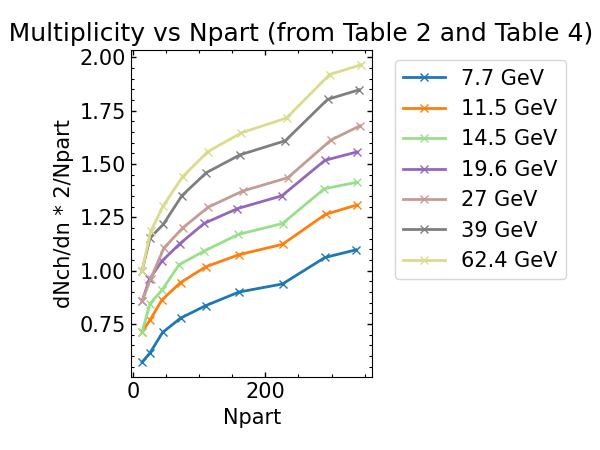

In [206]:

fig = plt.figure()

for index, energy_key in enumerate(energy_keys):
    # plot dNch/dn * 2/Npart vs Npart
    # approximate dNch/dn ≈ Nch (midrapidity)
    plt.plot(Npart[index], Nch[index] * 2/Npart[index], marker='x', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV")
 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel(r"Npart")
plt.ylabel(r"dNch/dn * 2/Npart")
plt.title("Charge Multiplicity vs Npart (from Table 2 and Table 4)")    
plt.tight_layout()

## Comments on <em>Analysis of Tables 2 ($N_{ch}$) and 4 ($N_{part}$)</em>:

As you can see, there is an unexpected spike against the smooth trend in the data at higher $N_{part}$, specifically the 0-5% and 5-10% centrality bins. 

# Analysis of Tables 6 - 19 (Charged Hadron) and 20 - 109 (Individual Species)

Individual species include: $p$, $\overline{p}$, $K^+$, $K^-$, $\pi^+$, $\pi^-$.

In [207]:
# charged hadron and individual particle species
particles = ["charged_hadron (Tables 6-19)","proton (Tables 20-34)", "antiproton (Tables 35-49)", 
             "kaon_plus (Tables 50-64)", "kaon_minus (Tables 65-79)", "pion_plus (Tables 80-94)", 
             "pion_minus (Tables 95-109)"]


## Integrating Momentum Spectra $\frac{1}{2\pi p_T} * \frac{d^2N}{d\eta dp_T}$ over $p_T$ (and multiplying by $2\pi p_T$) to get $\frac{dN}{d\eta}$ for both Tables 6 -19 (Charged Hadron) and 20 - 109 (Individual Species):

After integration, data for the particles from Tables 20 - 109 will be summed in order to compare with charged hadron data from Tables 6 - 19. 

In [208]:
# Nch at each centrality at each energy for each particle
particle_Nch = []

# csv tables 6 - 109
csv_tables6_109 = csv_tables[5:]

# charged hadron tables start at index 0, have 14 tables, and each centrality starts at pT = 0.525 GeV/c 
start_index = 0 
number_of_tables = 14
pT_start_value = 0.525

# reset N_ch = 0 
N_ch = 0

for particle_index, particle in enumerate(particles):
    
    # if not charged hadron tables, individual species tables start at index particle_index*15-1, 
    # have 15 tables each, and each centrality starts at pT = 0.55 GeV/c 
    if particle_index > 0:
        start_index = particle_index*15-1
        number_of_tables = 15
        pT_start_value = 0.55
    
    energy_Nch = [] 
    centrality_Nch = []
     
    # for each table within charged hadron tables or individual species tables
    for table_index, table in enumerate(csv_tables6_109[start_index:start_index+number_of_tables]):
        
        for row in table:
            # append N_ch, then restart N_ch if beginning of new centrality
            if row[0] == pT_start_value:
                centrality_Nch.append(N_ch)
                N_ch = 0
            # integrate N_ch
            N_ch = N_ch + row[0]*2*pi*(row[2]-row[1])*row[3] 
            
    
        # boolean whether table index number is even
        even = table_index%2 == 0
        
        # append last Nch, then append all centralities, then restart centralities if beginning of new energy
        if ((particle_index == 0 and not even) or (particle_index !=0 and ((table_index < 5 and not even) or (table_index > 5 and even)))):
            centrality_Nch.append(N_ch)
            energy_Nch.append(array(centrality_Nch[1:]))
            centrality_Nch = []
            N_ch = 0
    
    # append all energies to particle_Nch 
    particle_Nch.append(array(energy_Nch))

# summing all individual particles and appending to particle_Nch
sum_particles = zeros(size(particle_Nch[-1]))
for particle in particle_Nch[1:]:
    sum_particles = sum_particles + particle
particle_Nch.append(sum_particles)  

print(particle_Nch[0])
print(particle_Nch[-1])

[[ 81.51177588  66.24283596  49.87858071  27.26859479  10.08347582
    2.7317229 ]
 [ 95.8430404   77.76347269  58.48040801  32.1588832   11.95559883
    3.28556157]
 [106.99867562  87.36445677  65.94568957  35.95941568  13.12164849
    3.60463358]
 [119.96661166  97.42184064  73.4245212   40.22342853  14.90688582
    4.16459131]
 [134.42921784 109.69059593  82.93684972  45.84697758  17.20966743
    4.67082526]
 [145.89606101 119.72535919  90.97738716  50.38982919  18.72451943
    5.14952958]
 [174.2957256  142.99228259 108.39956969  59.82075713  22.19332083
    5.85462758]]
[array([ 3.17716566, 11.77478206, 32.17721184, 59.5475873 , 79.59033454,
       98.28620962])
 array([  3.70930558,  13.51976741,  36.22770734,  65.96815811,
        88.08387853, 108.96974226])
 array([  4.08295381,  14.95482905,  32.0610559 ,  50.0788735 ,
        74.9384465 ,  99.21219932, 122.22751611])
 array([  4.65874114,  16.57189744,  44.89567352,  82.0208039 ,
       108.49053423, 132.21968342])
 array([  

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


## Plot Charge Multiplicity ($\frac{dN_{ch}}{d\eta} * \frac{2}{N_{part}}$) vs ${N}_{{part}}$ using Tables 6 - 19 and 20 - 109:

The plot below shows $\frac{dN_{ch}}{d\eta} * \frac{2}{N_{part}}$ by using the values of $\frac{dN}{d\eta}$ we calculated directly from charged hadron data as wll as from the sum of the individual particle species. $N_{part}$ is still taken from Table 4, but is modified to match the number of centrality bins (Table 4 has 9 bins, Tables 6 - 109 has 6 bins, but for Tables 20 - 109, 14.5 GeV data only has 7 bins). 

In [209]:
# match centrality bins
Npart_array = array(Npart)

# 6 bins 
Npart6_109 = zeros((len(Npart_array),6))
Npart6_109[:,:3] = Npart_array[:,:3]
Npart6_109[:,3:] = transpose(array([(Npart_array[:,i]+Npart_array[:,i+1])/2 for i in [3,5,7] ]))

# 7 bins for 14.5 GeV data in Tables 20 - 109
Npart14_5 = zeros((len(Npart_array),7))
Npart14_5[:,:5] = Npart_array[:,:5]
Npart14_5[:,5:] = transpose(array([(Npart_array[:,i]+Npart_array[:,i+1])/2 for i in [5,7] ]))


<IPython.core.display.Javascript object>


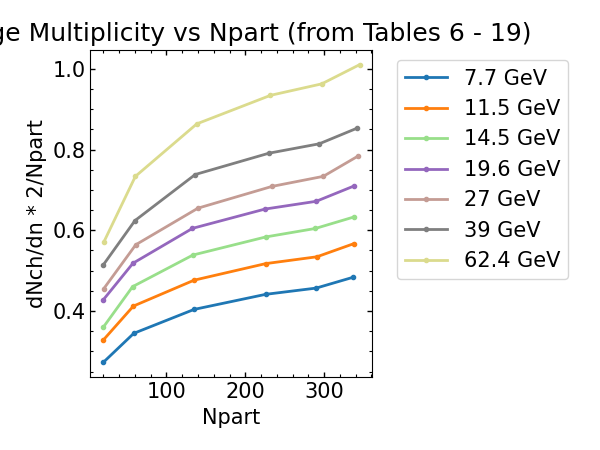

<IPython.core.display.Javascript object>


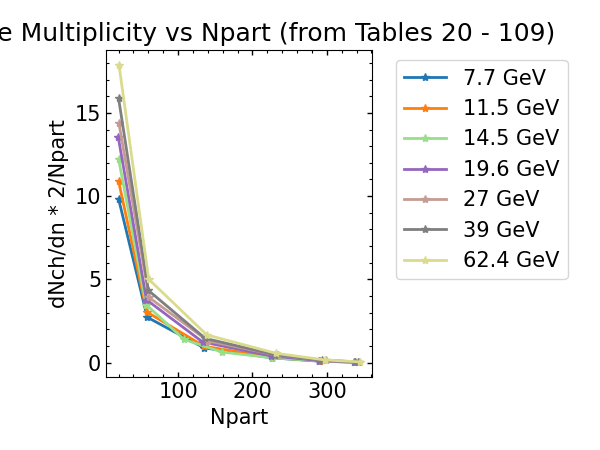

In [210]:

fig = plt.figure()

# plot dNch/dn * 2/Npart vs Npart from charged hadrons
for index, energy_key in enumerate(energy_keys):
    plt.plot(Npart6_109[index], particle_Nch[0][index] * 2/Npart6_109[index], marker='.', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV")
 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel(r"Npart")
plt.ylabel(r"dNch/dn * 2/Npart")
plt.title("Charge Multiplicity vs Npart (from Tables 6 - 19)")    
plt.tight_layout()

fig = plt.figure()

# plot dNch/dn * 2/Npart vs Npart from summing individual particle species
for index, energy_key in enumerate(energy_keys):
    if (energy_key == 14.5):
        plt.plot(Npart14_5[index], particle_Nch[-1][index] * 2/Npart14_5[index], marker='*', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV")
        continue
    plt.plot(Npart6_109[index], particle_Nch[-1][index] * 2/Npart6_109[index], marker='*', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV")
 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel(r"Npart")
plt.ylabel(r"dNch/dn * 2/Npart")
plt.title("Charge Multiplicity vs Npart (from Tables 20 - 109)")    
plt.tight_layout()


## Comments on <em>Analysis of Tables 6 - 19 (Charged Hadron) and 20 - 109 (Individual Species)</em>:

As you can see, the charged multiplicity plots generated using the charged hadron data from Tables 6 - 19 are much more smoother, as expected. However, there is an unexpected downward trend when summing the individual particle species from Tables 20 - 19. This might be the case if the labelling is reversed.

# Reversing the Centralities:

We can again plot the data of the particle sums, but reversing the centralities at each energy. 

Using Reversed Data Set:


<IPython.core.display.Javascript object>


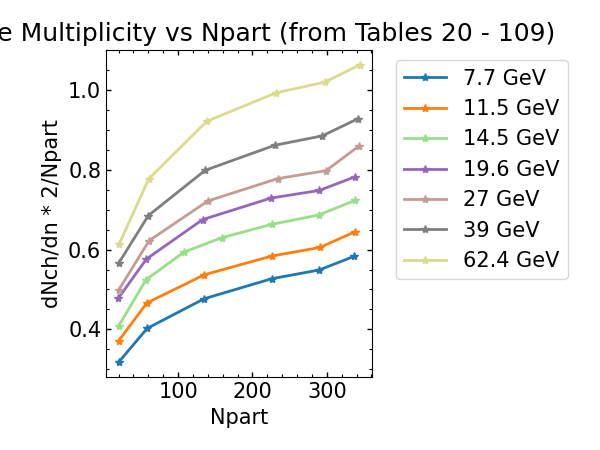

In [213]:
print("Using Reversed Data Set:")
fig = plt.figure()

# plot dNch/dn * 2/Npart vs Npart from summing individual particle species, but this time reversing y values
for index, energy_key in enumerate(energy_keys):
    if (energy_key == 14.5):
        plt.plot(Npart14_5[index], flip(particle_Nch[-1][index]) * 2/Npart14_5[index], marker='*', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV")
        continue
    plt.plot(Npart6_109[index], flip(particle_Nch[-1][index]) * 2/Npart6_109[index], marker='*', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV")
 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel(r"Npart")
plt.ylabel(r"dNch/dn * 2/Npart")
plt.title("Charge Multiplicity vs Npart (from Tables 20 - 109)")  
plt.tight_layout()

## Comments on <em>Reversing the Centralities</em>:

The plots are much better, with the expected upward trend.

# Superimposed Plots:

Now, let's check all the plots superimposed. 

Crosses are Table 2.
Dots are Tables 6 - 19. (Charged Hadron)
Stars are Tables 20 - 109. (Sum Individual Particle Species)


<IPython.core.display.Javascript object>


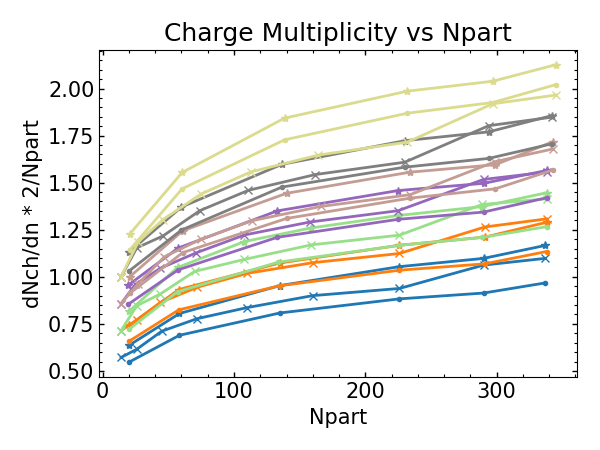

In [243]:
print("Crosses are Table 2.")
print("Dots are Tables 6 - 19. (Charged Hadron)")
print("Stars are Tables 20 - 109. (Sum Individual Particle Species)")
fig = plt.figure()

for index, energy_key in enumerate(energy_keys):
    # plot dNch/dn * 2/Npart vs Npart
    # approximate dNch/dn ≈ Nch (midrapidity)
    plt.plot(Npart[index], Nch[index] * 2/Npart[index], marker='x', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV: Nch (2)")
    plt.plot(Npart6_109[index], 2*particle_Nch[0][index] * 2/Npart6_109[index], marker='.', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV: Charged Hadron (6-19)")
    if (energy_key == 14.5):
        plt.plot(Npart14_5[index], 2*flip(particle_Nch[-1][index]) * 2/Npart14_5[index], marker='*', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV: Sum (20-109)")
        continue
    plt.plot(Npart6_109[index], 2*flip(particle_Nch[-1][index]) * 2/Npart6_109[index], marker='*', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV: Sum (20-109)")

# legend gets in the way    
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel(r"Npart")
plt.ylabel(r"dNch/dn * 2/Npart")
plt.title("Charge Multiplicity vs Npart")  
plt.tight_layout()


## Comments on <em>Superimposed Plots</em>:

The plots are similar in trend (besides the spike), but seem to be vertcally scaled. First, the difference in charged hadron (Tables 6 - 19) and sum of individual particle species (Tables 20 - 109) may be explained by mislabelling. Particularly, the graphs in the supplemental paper were labelled as $\frac{1}{2\pi p_T} * \frac{d^2N}{dy dp_T}$ while the tables were labelled as $\frac{1}{2\pi p_T} * \frac{d^2N}{d\eta dp_T}$. 

# Adding the Jacobian:

This can be fixed by using the Jacobian: 

## $\frac{dN}{d\eta dp_T} = \sqrt{1 - \frac{m^2}{m_T^2 cosh^2y}} \frac{dN}{dy dp_T}$

We will assume $cosh^2y$ ≈ 1, if we approximate y ≈ 0. So, the Jacobian reduces to:

## $\frac{dN}{d\eta dp_T} = \sqrt{1 - \frac{m^2}{m_T^2}} \frac{dN}{dy dp_T}$ where $m_T=\sqrt{m^2+p_T^2}$

In [215]:
# mass of each particle
mass = array([0.93828,0.93828, 0.49368,0.49368,0.139568,0.139568])

# Nch at each centrality at each energy for each particle
particle_Nch_with_Jacobian = []

# reset N_ch = 0 
N_ch = 0

# these are not charged hadron tables so they
# have 15 tables each, and each centrality starts at pT = 0.55 GeV/c 
number_of_tables = 15
pT_start_value = 0.55

#exclude charged hadron tables
for particle_index, particle in enumerate(particles[1:]):
    #mass of each particle used for Jacobian
    m = mass[particle_index]
    #individual species tables start at index particle_index*15-1, 
    start_index = (particle_index+1)*15-1 
    
    energy_Nch = [] 
    centrality_Nch = []
     
    # for each table within charged hadron tables or individual species tables
    for table_index, table in enumerate(csv_tables6_109[start_index:start_index+number_of_tables]):
        
        for row in table:
            # append N_ch, then restart N_ch if beginning of new centrality
            if row[0] == pT_start_value:
                centrality_Nch.append(N_ch)
                N_ch = 0
            # integrate N_ch, but now with Jacobian
            mT = sqrt(m**2+row[0]**2)
            Jacobian = sqrt(1-(m**2)/(mT**2))
            N_ch = N_ch + Jacobian*row[0]*2*pi*(row[2]-row[1])*row[3] 
    
        # boolean whether table index number is even
        even = table_index%2 == 0
        
        # append last Nch, then append all centralities, then restart centralities if beginning of new energy
        if ((table_index < 5 and not even) or (table_index > 5 and even)):
            centrality_Nch.append(N_ch)
            energy_Nch.append(array(centrality_Nch[1:]))
            centrality_Nch = [] 
            N_ch = 0
    
    # append all energies to particle_Nch 
    particle_Nch_with_Jacobian.append(array(energy_Nch))

# summing all individual particles and appending to particle_Nch
sum_particles = zeros(size(particle_Nch_with_Jacobian[-1]))
for particle in particle_Nch_with_Jacobian:
    sum_particles = sum_particles + particle
particle_Nch_with_Jacobian.append(sum_particles)  


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


## Plotting with Jacobian

The plots for charged hadron (Tables 6 - 19) and sum of individual particle species (Tables 20 - 109) are shown below, but now with the additional Jacobian factor for Tables 20 - 109.

Crosses are Table 2.
Dots are Tables 6 - 19. (Charged Hadron)
Stars are Tables 20 - 109. (Sum Individual Particle Species, with Jacobian)


<IPython.core.display.Javascript object>


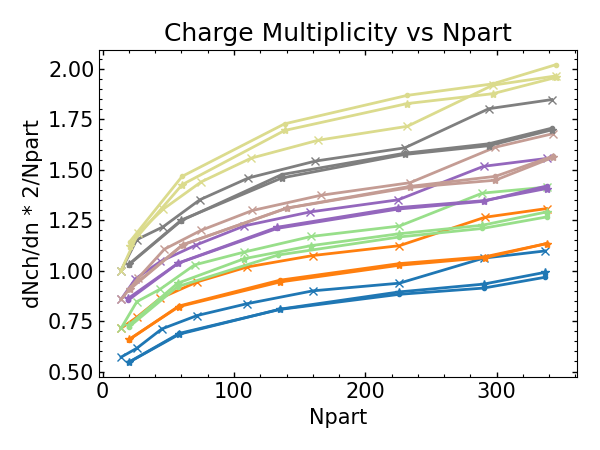

In [244]:
print("Crosses are Table 2.")
print("Dots are Tables 6 - 19. (Charged Hadron)")
print("Stars are Tables 20 - 109. (Sum Individual Particle Species, with Jacobian)")
fig = plt.figure()

for index, energy_key in enumerate(energy_keys):
    # plot dNch/dn * 2/Npart vs Npart
    # approximate dNch/dn ≈ Nch (midrapidity)
    plt.plot(Npart[index], Nch[index] * 2/Npart[index], marker='x', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV: Nch (2)")
    plt.plot(Npart6_109[index], 2*particle_Nch[0][index] * 2/Npart6_109[index], marker='.', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV: Charged Hadron (6-19)")
    if (energy_key == 14.5):
        plt.plot(Npart14_5[index], 2*flip(particle_Nch_with_Jacobian[-1][index]) * 2/Npart14_5[index], marker='*', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV: Sum, with Jacobian (20-109)")
        continue
    plt.plot(Npart6_109[index], 2*flip(particle_Nch_with_Jacobian[-1][index]) * 2/Npart6_109[index], marker='*', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV: Sum, with Jacobian (20-109)")

# legend gets in the way    
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel(r"Npart")
plt.ylabel(r"dNch/dn * 2/Npart")
plt.title("Charge Multiplicity vs Npart")  
plt.tight_layout()


## Comments on <em>Adding the Jacobian</em>:

Adding the Jacobian to Tables 20 - 109 makes the plot of the sum of the individual particle species very close to the charged hadrons (almost directly on top of each other), which provides evidence that the table labels are mislabelled as $\frac{1}{2\pi p_T} * \frac{d^2N}{d\eta dp_T}$ when it should follow the graph labels as $\frac{1}{2\pi p_T} * \frac{d^2N}{dy dp_T}$ in the supplemental paper. However, both plots are still well below the plots generated directly from Table 2 ($N_{ch}$). This may be due to the fact that the momentum spectra were recorded for $p_T$ greater than 0.5 GeV. 

# Extrapolating experimental data to low pT: 

The momentum spectra for individual particle species was extrapolated to low momentum (0.1 - 0.5 MeV). 

<IPython.core.display.Javascript object>


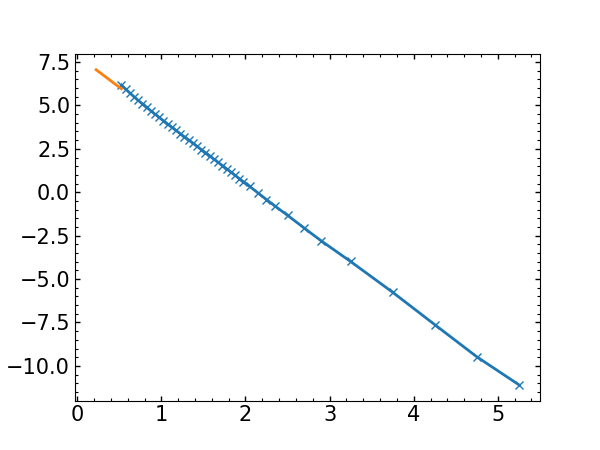

<IPython.core.display.Javascript object>


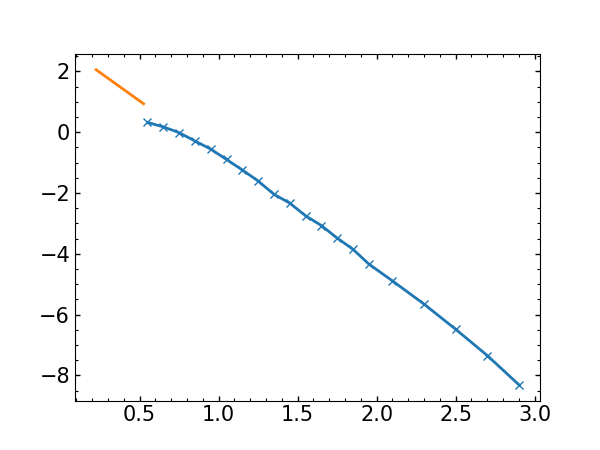

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


<IPython.core.display.Javascript object>


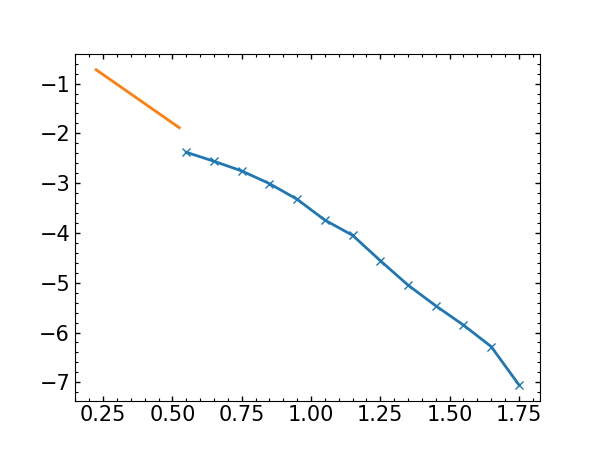

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


<IPython.core.display.Javascript object>


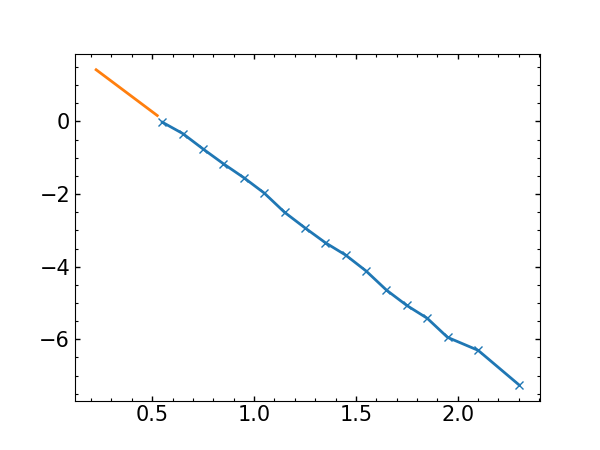

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


<IPython.core.display.Javascript object>


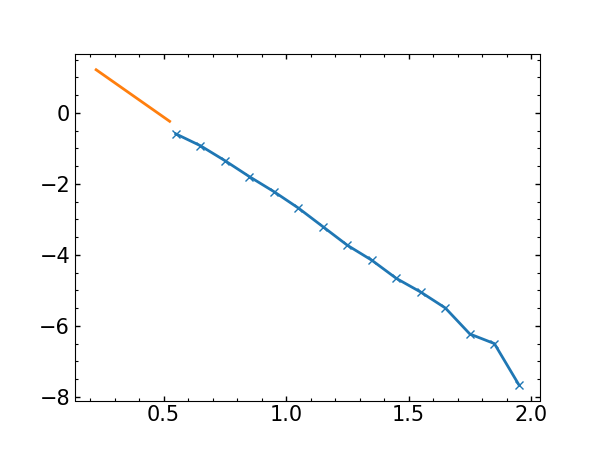

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


<IPython.core.display.Javascript object>


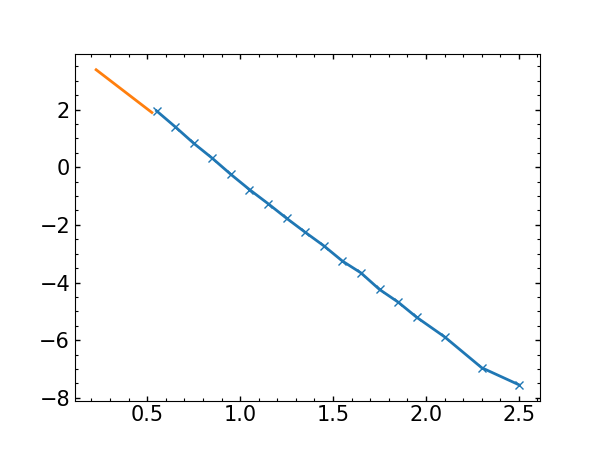

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


<IPython.core.display.Javascript object>


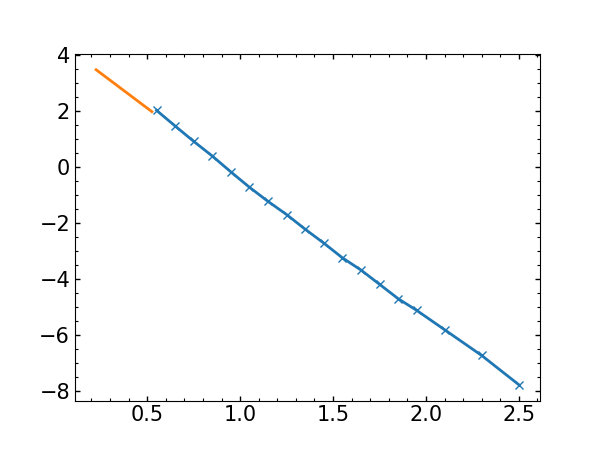

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [237]:
particle_Nch_with_extrapolation = []
# mass of each particle (add charged hadron)
mass = array([0,0.93828,0.93828, 0.49368,0.49368,0.139568,0.139568])
# reset N_ch = 0 
N_ch = 0

start_index = 0
end_index = 14
pT_start_value = 0.525

low_bin_x = array([0.20,0.25,0.30,0.35,0.40,0.45,0.5])
high_bin_x = array([0.25,0.30,0.35,0.40,0.45,0.5,0.55])
extrapolated_x = (low_bin_x + high_bin_x)/2
extrapolated_y = zeros(size(extrapolated_x))

original_x = []
original_y = []

#print(extrapolated_x, extrapolated_y)
#exclude charged hadron tables
for particle_index, particle in enumerate(particles):
    #mass of each particle used for Jacobian
    m = mass[particle_index]
    
    #individual species tables start at index particle_index*15-1, 
    if (particle_index > 0):
        start_index = particle_index*15-1
        end_index = start_index + 15
        pT_start_value = 0.55
    #print(start_index)
    energy_Nch_extrapolation = [] 
    centrality_Nch_extrapolation = []
     
    # used for fitting and extrapolation
    
    i = 0
    # for each table within charged hadron tables or individual species tables
    for table_index, table in enumerate(csv_tables6_109[start_index:end_index]):
        
        
        for row in table:
            # append N_ch, then restart N_ch if beginning of new centrality
            if row[0] == pT_start_value:
                
                
                # check by plotting original_x and original_y
                
                if(original_x != []):     
                    slope,b = polyfit(original_x, log(original_y), 1)
                    
                    # extrapolate each centrality down to pT = 0.1
                    extrapolated_y = (high_bin_x-low_bin_x)*extrapolated_x*e**(slope*extrapolated_x + b)
                    #print(extrapolated_x, extrapolated_y)
                    
                    # integrate from pT = 0.1 to pT = 0.5
                    extrapolation = sum(extrapolated_y)
                    
                else:
                    extrapolation = 0
                
                # add this sum to N_ch
                new_N_ch = N_ch + extrapolation
                if i == 7:
                    fig = plt.figure()
                    #print("plot",original_x, original_y, log(original_y))
                    plt.plot(original_x, log(original_y), marker='x', label=" log")
                    plt.plot(extrapolated_x, (slope*extrapolated_x + b))
                i = i+1
                
                
                # append new N_ch
                centrality_Nch_extrapolation.append(new_N_ch)   
                original_x = []
                original_y = []
                N_ch = 0
            
            
            # integrate N_ch, but now with Jacobian
            mT = sqrt(m**2+row[0]**2)
            Jacobian = sqrt(1-(m**2)/(mT**2))
            
            # append Jacobian * d^2N_ch/detadp_T to original_y and append pT to original_x
            # ignore 0 values for y. 
            if (row[3] != 0):
                original_x.append(row[0])
                original_y.append(Jacobian*2*pi*row[3])
            #print("value",m)
            
            N_ch = N_ch + Jacobian*row[0]*2*pi*(row[2]-row[1])*row[3] 
            
        # boolean whether table index number is even
        even = table_index%2 == 0
        
        # append last Nch, then append all centralities, then restart centralities if beginning of new energy
        
        if ((particle_index == 0 and not even) or (particle_index !=0 and ((table_index < 5 and not even) or (table_index > 5 and even)))):
            # do last sub table too
            
            slope,b = polyfit(original_x, log(original_y), 1)
            extrapolated_y = (high_bin_x-low_bin_x)*extrapolated_x*e**(slope*extrapolated_x + b)
            
            extrapolation = sum(extrapolated_y)
            new_N_ch = N_ch + extrapolation
            centrality_Nch_extrapolation.append(new_N_ch)##############
            energy_Nch_extrapolation.append(array(centrality_Nch_extrapolation[1:]))
            # restart new centrality
            original_x = []
            original_y = []
            centrality_Nch_extrapolation = [] 
            N_ch = 0
    
    # append all energies to particle_Nch 
    particle_Nch_with_extrapolation.append(array(energy_Nch_extrapolation))

# summing all individual particles and appending to particle_Nch
sum_particles_extrapolation = zeros(size(particle_Nch_with_extrapolation[-1]))
for particle in particle_Nch_with_extrapolation[1:]:
     sum_particles_extrapolation = sum_particles_extrapolation + particle
particle_Nch_with_extrapolation.append(sum_particles_extrapolation)  




In [238]:
print(particle_Nch_with_extrapolation[0])
print(particle_Nch_with_extrapolation[-1])


[[157.33069359 129.39688048  98.42280996  54.41107212  21.69972006
    6.75386123]
 [180.68885329 145.27439003 109.65442112  61.88003424  23.63809971
    7.34834318]
 [197.71741657 162.38246567 119.67001049  66.45076768  25.03434278
    7.45542101]
 [209.16400418 171.78750952 127.9034911   70.11062882  26.50347535
    7.72939966]
 [212.15594275 178.66943435 134.08614353  73.5960473   27.85155969
    7.76583267]
 [209.19069145 170.38275095 129.1334469   68.03453411  26.31947269
    7.58147659]
 [221.14024362 187.62039554 136.73940232  75.22730396  28.20882514
    7.66724577]]
[array([  7.94301631,  25.22716181,  63.00127683, 112.66190321,
       150.30695252, 186.70796642])
 array([  8.18246883,  26.24737411,  67.04827038, 118.12884486,
       161.38174681, 201.05239524])
 array([  8.14396618,  28.47005832,  59.13253562,  91.58134105,
       136.95768285, 177.9905427 , 220.95311664])
 array([  8.56656202,  27.65478401,  73.78289835, 135.70169618,
       180.86286727, 220.32495624])
 arr

## Plotting with Extrapolation

The plots for charged hadron (Tables 6 - 19) and sum of individual particle species (Tables 20 - 109) are shown below, but now with the additional Jacobian factor including extrapolation down t0 0.1 MeV for Tables 20 - 109.

Crosses are Table 2.
Dots are Tables 6 - 19. (Charged Hadron)
Stars are Tables 20 - 109. (Sum Individual Particle Species, with Jacobian and Extrapolation)


<IPython.core.display.Javascript object>


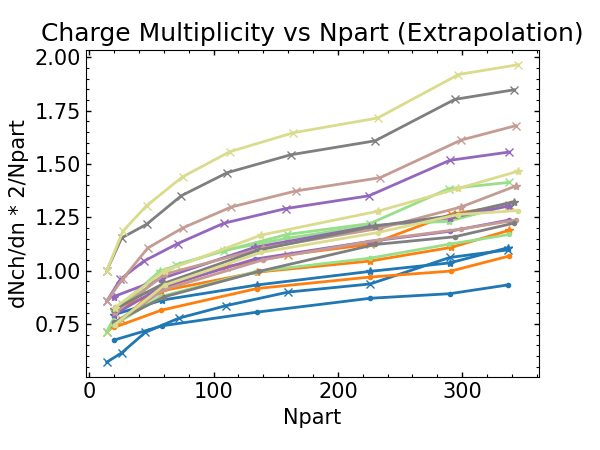

In [239]:
print("Crosses are Table 2.")
print("Dots are Tables 6 - 19. (Charged Hadron)")
print("Stars are Tables 20 - 109. (Sum Individual Particle Species, with Jacobian and Extrapolation)")
fig = plt.figure()

for index, energy_key in enumerate(energy_keys):
    # plot dNch/dn * 2/Npart vs Npart
    # approximate dNch/dn ≈ Nch (midrapidity)
    plt.plot(Npart[index], Nch[index] * 2/Npart[index], marker='x', color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV: Nch (2)")
    plt.plot(Npart6_109[index], particle_Nch_with_extrapolation[0][index] * 2/Npart6_109[index], marker='.', color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV: Charged Hadron (6-19)")
#     if (energy_key != 14.5):
#         plt.plot(Npart6_109[index], particle_Nch_with_extrapolation[0][index] * 2/Npart6_109[index], marker='.', #linestyle="None",
#              color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV: Charged Hadron, with Extrapolation (6-19)")
    if (energy_key == 14.5):
        plt.plot(Npart14_5[index], flip(particle_Nch_with_extrapolation[-1][index]) * 2/Npart14_5[index], marker='*', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV: Sum, with Jacobian & Extrapolation (20-109)")
        continue
    plt.plot(Npart6_109[index], flip(particle_Nch_with_extrapolation[-1][index]) * 2/Npart6_109[index], marker='*', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV: Sum, with Jacobian & Extrapolation (20-109)")

# legend gets in the way    
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel(r"Npart")
plt.ylabel(r"dNch/dn * 2/Npart")
plt.title("Charge Multiplicity vs Npart (Extrapolation)")  
plt.tight_layout()


## Comments on <em>Extrapolating to low pT</em>:

Adding the extrapolation to Tables 20 - 109 makes the plot of the sum of the individual particle species very close to the charged hadrons (almost directly on top of each other), which provides evidence that the table labels are mislabelled as $\frac{1}{2\pi p_T} * \frac{d^2N}{d\eta dp_T}$ when it should follow the graph labels as $\frac{1}{2\pi p_T} * \frac{d^2N}{dy dp_T}$ in the supplemental paper. However, both plots are still well below the plots generated directly from Table 2 ($N_{ch}$). This may be due to the fact that the momentum spectra were recorded for $p_T$ greater than 0.5 GeV. 

In [107]:
print(number_of_tables)

15
